# Probabilistic Data Mining Lab 1
### Mariia Zameshina, Pasha Fedosov, Aidan Mannion, Charles Marshall

In [84]:
%load_ext autoreload
%autoreload 2

from sklearn import mixture
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats as spstat
import numpy as np
import pandas as pd
import altair as alt
import statistics as stat
import pylab as pl

alt.renderers.enable('notebook')
import os
import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Preparatory Lab Work and Modeling

Questions 1 and 4 of this section are provided in our lab report. Here, we provide figures for the simulated sample with the asked parameters (questions 2 & 3), and for the unistroke letter A data.

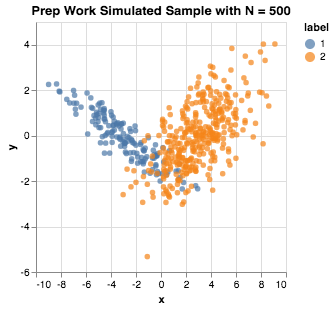

In [85]:
x,y = np.random.multivariate_normal([-3,0], [[5,-2],[-2,1]], size = 150).T
x2, y2 = np.random.multivariate_normal([3,0], [[5,2],[2,2]], 350).T

util.plot(util.df_fromarr(x = list(x) + list(x2),\
                        y = list(y) + list(y2),\
                        label = [1]*150 +[2]*350),"Prep Work Simulated Sample with N = 500")
       

### 2. Data Analysis: Gaussian Model

### 2.1. Estimated GMM's
We first provide the unlabeled data for A and Amerge, followed by the estimated labels and parameters printed below. 

If the A data does not get well-labeled, please run the next cell multiple times. We provide coments on this behavior in our report. 

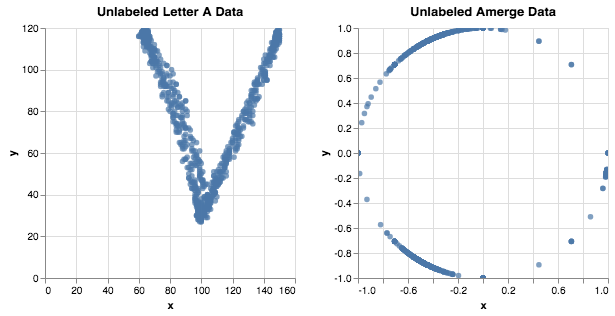

Parameters for A Data:
Mean of class 0 = [101.53, 98.58], (co)-variance of class 0 = [[49.45, 48.81], [48.81, 97.47]]
Mean of class 1 = [104.23, 41.09], (co)-variance of class 1 = [[1155.47, -27.1], [-27.1, 350.72]]

Parameters for Amerge Data:
Mean of class 0 = [-0.37, 0.91], (co)-variance of class 0 = [[0.27, 0.08], [0.08, 0.12]]
Mean of class 1 = [-0.3, -0.72], (co)-variance of class 1 = [[0.04, 0.01], [0.01, 0.01]]



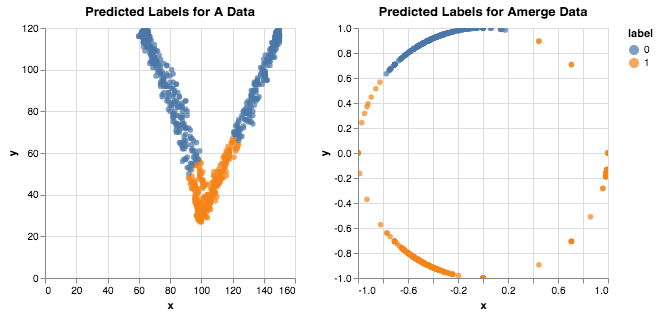

In [86]:
GMM = mixture.GaussianMixture(n_components = 2)

#Getting all A letter data amd removing points where x < 0 
A = util.get_data("./Unistroke/",*[f for f in os.listdir("./Unistroke/") if ((f[0] == 'A') and (f[1] != 'm'))])

flag = 0
for item in list(A):
    if item[0] < 0:
        continue
    elif flag == 0:
        new = np.array(item)
        flag = 1
    else:
        new = np.vstack((new, item))
A = new

A_labeled_df = util.df_fromarr(x = [x[0] for x in A],\
                                    y = [x[1] for x in A],\
                                    label= GMM.fit_predict(A))
#Getting all Amerge Data
Amerge = util.get_data("./Unistroke/", "Amerge.txt")
Amerge_labeled_df = util.df_fromarr(x = [x[0] for x in Amerge],\
                                    y = [x[1] for x in Amerge],\
                                    label= GMM.fit_predict(Amerge))

#Plotting unabeled, and predicted labels for both A and Amerge & printing parameters 
util.plot(util.df_fromarr(x = [x[0] for x in A],\
                        y = [x[1] for x in A]), "Unlabeled Letter A Data",\
          util.df_fromarr(x=[x[0] for x in Amerge],\
                          y=[x[1] for x in Amerge]), "Unlabeled Amerge Data")

util.plot(A_labeled_df, "Predicted Labels for A Data",\
        Amerge_labeled_df, "Predicted Labels for Amerge Data")
     
util.mean_variance(A_labeled_df, name = "A Data")
util.mean_variance(Amerge_labeled_df, name = "Amerge Data")

### 2.2. Pdf's
Now we provide the 2D log(pdf) with contours using the same data obtained from the previous two figures. Note that the coloring is different since we have switched over to using matplotlib. 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Log scale: values of z <= 0 have been masked
  


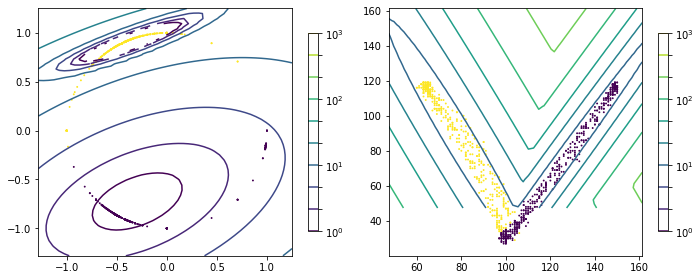

In [87]:
#plotting above data
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
x1,y1,z1 = util.two_dim_contour(GMM.fit(Amerge), Amerge)
CS = plt.contour(x1, y1, z1, norm=LogNorm(vmin=1.0, vmax=1000.0),
                levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(Amerge[:, 0], Amerge[:, 1],.8, c=GMM.fit_predict(Amerge))
#plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')

plt.subplot(1, 2, 2)
x2,y2,z2 = util.two_dim_contour(GMM.fit(A), A)
CS = plt.contour(x2, y2, z2, norm=LogNorm(vmin=1.0, vmax=1000.0),
                levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(A[:, 0], A[:, 1],.8, c=GMM.fit_predict(A))
#plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.tight_layout()

plt.show()


### 2.3 (a&b) Marginal Histograms (with Amerge only)

In [88]:
#gathering raw and labeled data
x_data = sorted([x[0] for x in Amerge])
y_data = sorted([x[1] for x in Amerge])
x_pdf = spstat.norm.pdf(x_data, stat.mean(x_data), stat.variance(x_data))
y_pdf = spstat.norm.pdf(y_data, stat.mean(y_data), stat.variance(y_data))

x0_data = sorted([x for x in Amerge_labeled_df['x'][Amerge_labeled_df['label']==0]])
x0_pdf = spstat.norm.pdf(x0_data, stat.mean(x0_data), stat.variance(x0_data))
y0_data = sorted([x for x in Amerge_labeled_df['y'][Amerge_labeled_df['label']==0]])
y0_pdf = spstat.norm.pdf(y0_data, stat.mean(y0_data), stat.variance(y0_data))
x1_data = sorted([x for x in Amerge_labeled_df['x'][Amerge_labeled_df['label']==1]])
x1_pdf = spstat.norm.pdf(x1_data, stat.mean(x1_data), stat.variance(x1_data))
y1_data = sorted([x for x in Amerge_labeled_df['y'][Amerge_labeled_df['label']==1]])
y1_pdf = spstat.norm.pdf(y1_data, stat.mean(y1_data), stat.variance(y1_data))

#function to make marginal histograms with gaussian
def plot_hist_gaussian(*args, **kwargs):
    flag = 0
    for i in range(len(args)):
        colors = ['b','r','k','c', 'm']
        if isinstance(args[i],list):
            plt.hist(args[i], 30, density=True,alpha=0.5, label=flag, color = colors[flag]);
        elif isinstance(item,np.ndarray):
            plt.plot(args[i-1], args[i], color= colors[flag])
            flag+=1     
    if 'title' in kwargs: plt.title(kwargs['title']) 
    #plt.legend(loc='upper right', title = 'Label')
    plt.show()




#### We first show marginal histograms in x and y with the estimated mixture of univariate gaussian pdfs.

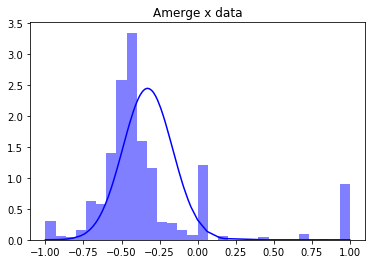

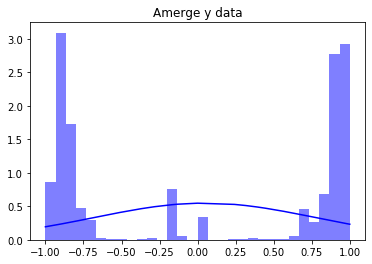

In [89]:
plot_hist_gaussian(x_data,x_pdf, title = "Amerge x data")
plot_hist_gaussian(y_data,y_pdf, title = "Amerge y data")

#### And now for each marginal, we separate by cluster and add unicariate Gaussian pdfs.


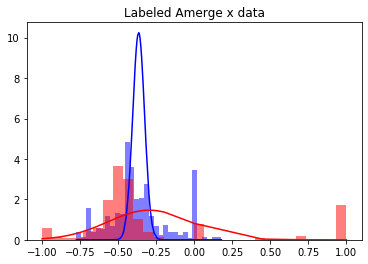

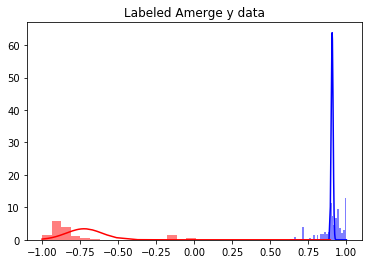

In [90]:
plot_hist_gaussian(x0_data,x0_pdf,x1_data,x1_pdf, title = "Labeled Amerge x data")
plot_hist_gaussian(y0_data,y0_pdf,y1_data,y1_pdf, title = "Labeled Amerge y data")

### 2.5. Plotting with P(Zi = 1 | Xi) as colormap DOESNT WORK YET

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


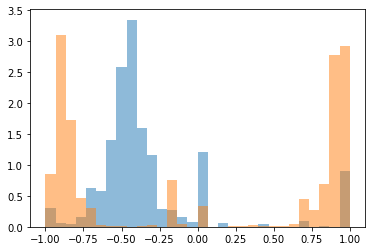

In [126]:
p_1 = list(Amerge_labeled_df['label']).count(1)/len(Amerge_labeled_df['label'])
nx, binsx, patchesx = plt.hist(x_data, 30, density=True,alpha=0.5);
ny, binsy, patchesy = plt.hist(y_data, 30, density=True,alpha=0.5);

def get_bin(val,bins):
    for i in range(len(bins)):
        if val < bins[i]:
            return i-1

def get_probs():
    probs = []
    for item in Amerge:
        prob = p_1 / ((nx[get_bin(item[0],binsx)]/sum(nx)) * (ny[get_bin(item[1],binsy)]/sum(ny)))
        probs.append(prob)
    return probs
x = get_probs()

# anerge_labeled_probab = util.df_fromarr(x = [x[0] for x in Amerge],\
#                                     y = [x[1] for x in Amerge],\
#                                     label= get_probs())
# alt.Chart(anerge_labeled_probab, height = 250, width = 250).mark_point(filled = True).encode(
#                     alt.X("x:Q"), alt.Y("y:Q"), alt.Color("label:Q")).interactive().display()


### 3. Mandatory Additional Questions

### 3.1. Transforming to angular data

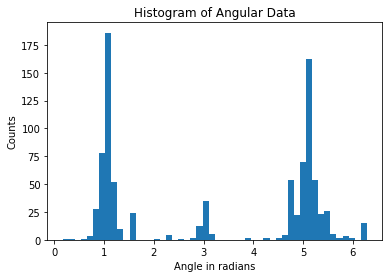

In [61]:
# convert Amerge to angles
A_angles = np.arctan2(Amerge[:,1], Amerge[:,0]) + np.pi

# plot histogram
plt.hist(A_angles, bins = 50)
plt.title('Histogram of Angular Data')
plt.ylabel('Counts')
plt.xlabel('Angle in radians')
plt.show()


### Von Mises Probability Density Functions

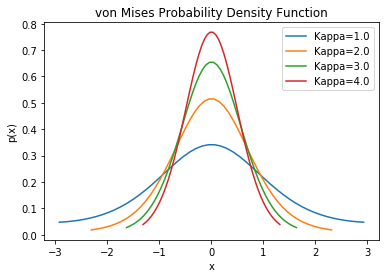

In [127]:
# plot von Mises pdfs
kappa_vec = np.linspace(1, 4, 4)
leg_str = np.array([])
for kappa in kappa_vec :
    vm_x = np.linspace(spstat.vonmises.ppf(0.01, kappa), spstat.vonmises.ppf(0.99, kappa))
    plt.plot(vm_x, spstat.vonmises.pdf(vm_x, kappa))
    leg_str = np.hstack((leg_str, 'Kappa={:.1f}'.format(kappa)))
plt.title('von Mises Probability Density Function')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(leg_str)
plt.show()
